In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import pickle
import datacompy
import os, sys
import numpy as np
import re
import ast
import gower
from pathlib import Path
import openpyxl

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    learning_curve,
    RepeatedStratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, accuracy_score, pairwise_distances, make_scorer, precision_score, f1_score, roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.spatial import distance
from joblib import dump, load

# modele
from xgboost import XGBClassifier, XGBRFClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# methods
from imblearn.under_sampling import ClusterCentroids, NearMiss
from scipy.optimize import differential_evolution
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier, NearestNeighbors
from sklearn.inspection import permutation_importance
from scipy.spatial.distance import euclidean
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
#from ctgan import CTGAN

### Read dataframes after preprocessing 

In [3]:
# Original df
original = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\encoded_normalized\\original_data_normalized.csv")

# KMeans + centeroid
borderline_KM_cent = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_KM_centroids.csv")
smote_KM_cent = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_KM_centroids.csv")
mix_KM_cent = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_KM_centroids.csv")
GAN_KM_cent = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_KM_centroids.csv")

# KMeans + the nearesrt neighbor
borderline_KM_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_KM_nn.csv")
smote_KM_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_KM_nn.csv")
mix_KM_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_KM_nn.csv")
GAN_KM_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_KM_nn.csv")

# KMeans + cosine similarity
borderline_KM_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_KM_cos.csv")
smote_KM_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_KM_cos.csv")
mix_KM_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_KM_cos.csv")
GAN_KM_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_KM_cos.csv")

# KMeans + cosine similarity + Mahalanobis distance
borderline_KM_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_KM_cos_mal.csv")
smote_KM_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_KM_cos_mal.csv")
mix_KM_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_KM_cos_mal.csv")
GAN_KM_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_KM_cos_mal.csv")

# HDBSCAN + the nearesrt neighbor
borderline_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_HDBSCAN_NN.csv")
smote_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_HDBSCAN_NN.csv")
mix_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_HDBSCAN_NN.csv")
GAN_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_HDBSCAN_NN.csv")

# HDBSCAN + cosine similarity
borderline_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_HDBSCAN_cos.csv")
smote_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_HDBSCAN_cos.csv")
mix_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_HDBSCAN_cos.csv")
GAN_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_HDBSCAN_cos.csv")

# Kmeans(number of samples calculated by HDBSCAN) + the nearesrt neighbor
borderline_KM_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_kmeans&hdbscan_nn.csv")
smote_KM_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_kmeans&hdbscan_nn.csv")
mix_KM_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_kmeans&hdbscan_nn.csv")
GAN_KM_HDBSCAN_nn = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_kmeans&hdbscan_nn.csv")

# Kmeans(number of samples calculated by HDBSCAN) + cosine similarity
borderline_KM_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_kmeans&hdbscan_cos.csv")
smote_KM_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_kmeans&hdbscan_cos.csv")
mix_KM_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_kmeans&hdbscan_cos.csv")
GAN_KM_HDBSCAN_cos = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_kmeans&hdbscan_cos.csv")  

# KMeans(number of samples calculated by HDBSCAN) + cosine similarity + Mahalanobis distance
borderline_KM_HDBSCAN_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\borderline_kmeans&hdbscan_cos&mal.csv")
smote_KM_HDBSCAN_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\smote_kmeans&hdbscan_cos&mal.csv")
mix_KM_HDBSCAN_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\mix_kmeans&hdbscan_cos&mal.csv")
GAN_KM_HDBSCAN_cos_maha = pd.read_csv("D:\\ml\\undersampling_data\\data\\ssh\\reduced\\GAN_kmeans&hdbscan_cos&mal.csv")

### Machine Learning

In [8]:
models = {}

models["DT"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 4)
models["DT_KM_C"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)
models["DT_KM_NN"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 4)
models["DT_KM_COS"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)
models["DT_KM_COS_MAHA"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)
models["DT_HDBSCAN_NN"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 2, max_depth= 8)
models["DT_HDBSCAN_COS"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)
models["DT_KM_SCAN_NN"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)
models["DT_KM_SCAN_COS"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 2, max_depth= 4)
models["DT_KM_SCAN_COS_MAHA"] = DecisionTreeClassifier(random_state= 0, min_samples_leaf= 1, max_depth= 8)

models["RF"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 12)
models["RF_KM_C"] = RandomForestClassifier(random_state= 0,n_estimators=40, min_samples_leaf= 1, max_depth= 12)
models["RF_KM_NN"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 8)
models["RF_KM_COS"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 8)
models["RF_KM_COS_MAHA"] = RandomForestClassifier(random_state= 0,n_estimators=40, min_samples_leaf= 1, max_depth= 8)
models["RF_HDBSCAN_NN"] = RandomForestClassifier(random_state= 0,n_estimators=40, min_samples_leaf= 1, max_depth= 8)
models["RF_HDBSCAN_COS"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 8)
models["RF_KM_SCAN_NN"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 8)
models["RF_KM_SCAN_COS"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 8)
models["RF_KM_SCAN_COS_MAHA"] = RandomForestClassifier(random_state= 0,n_estimators=80, min_samples_leaf= 1, max_depth= 12)

models["XGB"] = XGBClassifier(subsample= 1, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_C"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_NN"] = XGBClassifier(subsample= 1, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_COS"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_COS_MAHA"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)
models["XGB_HDBSCAN_NN"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)
models["XGB_HDBSCAN_COS"] = XGBClassifier(subsample= 1, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_SCAN_NN"] = XGBClassifier(subsample= 1, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_SCAN_COS"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)
models["XGB_KM_SCAN_COS_MAHA"] = XGBClassifier(subsample= 0.7, max_depth= 8, learning_rate= 0.1)

models["XGBRF"] = XGBRFClassifier(subsample= 0.7, random_state= 0, n_estimators= 40, max_depth= 8)
models["XGBRF_KM_C"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 40, max_depth= 8)
models["XGBRF_KM_NN"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 80, max_depth= 8)
models["XGBRF_KM_COS"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 80, max_depth= 8)
models["XGBRF_KM_COS_MAHA"] = XGBRFClassifier(subsample= 0.7, random_state= 0, n_estimators= 40, max_depth= 8)
models["XGBRF_HDBSCAN_NN"] = XGBRFClassifier(subsample= 0.7, random_state= 0, n_estimators= 80, max_depth= 8)
models["XGBRF_HDBSCAN_COS"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 80, max_depth= 8)
models["XGBRF_KM_SCAN_NN"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 40, max_depth= 8)
models["XGBRF_KM_SCAN_COS"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 80, max_depth= 8)
models["XGBRF_KM_SCAN_COS_MAHA"] = XGBRFClassifier(subsample= 1, random_state= 0, n_estimators= 40, max_depth= 8)

In [9]:
data = {}

# Data for grid search
""" data["original"] = (original.drop(columns=["target","source"]), original["target"])
data["KM_C"] = (borderline_KM_cent.drop(columns=["target","source"]), borderline_KM_cent["target"])
data["KM_NN"] = (borderline_KM_nn.drop(columns=["target","source"]), borderline_KM_nn["target"])
data["KM_COS"] = (borderline_KM_cos.drop(columns=["target","source"]), borderline_KM_cos["target"])
data["KM_COS_MAHA"] = (borderline_KM_cos_maha.drop(columns=["target","source"]), borderline_KM_cos_maha["target"])
data["HDBSCAN_NN"] = (borderline_HDBSCAN_nn.drop(columns=["target","source"]), borderline_HDBSCAN_nn["target"])
data["HDBSCAN_COS"] = (borderline_HDBSCAN_cos.drop(columns=["target","source"]), borderline_HDBSCAN_cos["target"])
data["KM_SCAN_NN"] = (borderline_KM_HDBSCAN_nn.drop(columns=["target","source"]), borderline_KM_HDBSCAN_nn["target"])
data["KM_SCAN_COS"] = (borderline_KM_HDBSCAN_cos.drop(columns=["target","source"]), borderline_KM_HDBSCAN_cos["target"])
data["KM_SCAN_COS_MAHA"] = (borderline_KM_HDBSCAN_cos_maha.drop(columns=["target","source"]), borderline_KM_HDBSCAN_cos_maha["target"]) """

# Data for models
data["DT"] = (original.drop(columns=["target","source"]), original["target"])
data["DT_KM_C"] = (borderline_KM_cent.drop(columns=["target","source"]), borderline_KM_cent["target"])
data["DT_KM_NN"] = (borderline_KM_nn.drop(columns=["target","source"]), borderline_KM_nn["target"])
data["DT_KM_COS"] = (borderline_KM_cos.drop(columns=["target","source"]), borderline_KM_cos["target"])
data["DT_KM_COS_MAHA"] = (borderline_KM_cos_maha.drop(columns=["target","source"]), borderline_KM_cos_maha["target"])
data["DT_HDBSCAN_NN"] = (borderline_HDBSCAN_nn.drop(columns=["target","source"]), borderline_HDBSCAN_nn["target"])
data["DT_HDBSCAN_COS"] = (borderline_HDBSCAN_cos.drop(columns=["target","source"]), borderline_HDBSCAN_cos["target"])
data["DT_KM_SCAN_NN"] = (borderline_KM_HDBSCAN_nn.drop(columns=["target","source"]), borderline_KM_HDBSCAN_nn["target"])
data["DT_KM_SCAN_COS"] = (borderline_KM_HDBSCAN_cos.drop(columns=["target","source"]), borderline_KM_HDBSCAN_cos["target"])
data["DT_KM_SCAN_COS_MAHA"] = (borderline_KM_HDBSCAN_cos_maha.drop(columns=["target","source"]), borderline_KM_HDBSCAN_cos_maha["target"])

data["RF"] = (original.drop(columns=["target","source"]), original["target"])
data["RF_KM_C"] = (smote_KM_cent.drop(columns=["target","source"]), smote_KM_cent["target"])
data["RF_KM_NN"] = (smote_KM_nn.drop(columns=["target","source"]), smote_KM_nn["target"])
data["RF_KM_COS"] = (smote_KM_cos.drop(columns=["target","source"]), smote_KM_cos["target"])
data["RF_KM_COS_MAHA"] = (smote_KM_cos_maha.drop(columns=["target","source"]), smote_KM_cos_maha["target"])
data["RF_HDBSCAN_NN"] = (smote_HDBSCAN_nn.drop(columns=["target","source"]), smote_HDBSCAN_nn["target"])
data["RF_HDBSCAN_COS"] = (smote_HDBSCAN_cos.drop(columns=["target","source"]), smote_HDBSCAN_cos["target"])
data["RF_KM_SCAN_NN"] = (smote_KM_HDBSCAN_nn.drop(columns=["target","source"]), smote_KM_HDBSCAN_nn["target"])
data["RF_KM_SCAN_COS"] = (smote_KM_HDBSCAN_cos.drop(columns=["target","source"]), smote_KM_HDBSCAN_cos["target"])
data["RF_KM_SCAN_COS_MAHA"] = (smote_KM_HDBSCAN_cos_maha.drop(columns=["target","source"]), smote_KM_HDBSCAN_cos_maha["target"])

data["XGB"] = (original.drop(columns=["target","source"]), original["target"])
data["XGB_KM_C"] = (mix_KM_cent.drop(columns=["target","source"]), mix_KM_cent["target"])
data["XGB_KM_NN"] = (mix_KM_nn.drop(columns=["target","source"]), mix_KM_nn["target"])
data["XGB_KM_COS"] = (mix_KM_cos.drop(columns=["target","source"]), mix_KM_cos["target"])
data["XGB_KM_COS_MAHA"] = (mix_KM_cos_maha.drop(columns=["target","source"]), mix_KM_cos_maha["target"])
data["XGB_HDBSCAN_NN"] = (mix_HDBSCAN_nn.drop(columns=["target","source"]), mix_HDBSCAN_nn["target"])
data["XGB_HDBSCAN_COS"] = (mix_HDBSCAN_cos.drop(columns=["target","source"]), mix_HDBSCAN_cos["target"])
data["XGB_KM_SCAN_NN"] = (mix_KM_HDBSCAN_nn.drop(columns=["target","source"]), mix_KM_HDBSCAN_nn["target"])
data["XGB_KM_SCAN_COS"] = (mix_KM_HDBSCAN_cos.drop(columns=["target","source"]), mix_KM_HDBSCAN_cos["target"])
data["XGB_KM_SCAN_COS_MAHA"] = (mix_KM_HDBSCAN_cos_maha.drop(columns=["target","source"]), mix_KM_HDBSCAN_cos_maha["target"])

data["XGBRF"] = (original.drop(columns=["target","source"]), original["target"])
data["XGBRF_KM_C"] = (GAN_KM_cent.drop(columns=["target","source"]), GAN_KM_cent["target"])
data["XGBRF_KM_NN"] = (GAN_KM_nn.drop(columns=["target","source"]), GAN_KM_nn["target"])
data["XGBRF_KM_COS"] = (GAN_KM_cos.drop(columns=["target","source"]), GAN_KM_cos["target"])
data["XGBRF_KM_COS_MAHA"] = (GAN_KM_cos_maha.drop(columns=["target","source"]), GAN_KM_cos_maha["target"])
data["XGBRF_HDBSCAN_NN"] = (GAN_HDBSCAN_nn.drop(columns=["target","source"]), GAN_HDBSCAN_nn["target"])
data["XGBRF_HDBSCAN_COS"] = (GAN_HDBSCAN_cos.drop(columns=["target","source"]), GAN_HDBSCAN_cos["target"])
data["XGBRF_KM_SCAN_NN"] = (GAN_KM_HDBSCAN_nn.drop(columns=["target","source"]), GAN_KM_HDBSCAN_nn["target"])
data["XGBRF_KM_SCAN_COS"] = (GAN_KM_HDBSCAN_cos.drop(columns=["target","source"]), GAN_KM_HDBSCAN_cos["target"])
data["XGBRF_KM_SCAN_COS_MAHA"] = (GAN_KM_HDBSCAN_cos_maha.drop(columns=["target","source"]), GAN_KM_HDBSCAN_cos_maha["target"])

### Grid Search

In [6]:
params_ = {
    "DT": {
        'max_depth': [4, 8],
        'min_samples_leaf': [1, 2],
        'random_state': [0]
    },
    "RF": {
        'n_estimators': [40, 80],
        'max_depth': [8, 12],
        'min_samples_leaf': [1],
        'random_state': [0]
    },
    "XGB": {
        'max_depth': [8, 12],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.7, 1]
    },
    "XGBRF": {
        'n_estimators': [40, 80],
        'max_depth': [8],
        'subsample': [0.7, 1],
        'random_state': [0]
    }
}

models_ = {
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(verbosity=0, use_label_encoder=False),
    "XGBRF": XGBClassifier(booster='gbtree', grow_policy='depthwise', importance_type='gain', tree_method='auto', verbosity=0, use_label_encoder=False)
}

results_ = {}

n_iter = 30

scoring_metrics = {
    'precision': 'precision',
    'accuracy': 'accuracy',
    'f1-score': 'f1',
    'roc_auc': 'roc_auc'
}


for name, (X, y) in data.items():
    print(f"\n🟦 Dataset: {name}")
    results_[name] = {}

    for model_name in models_.keys():
        print(f" 🔍 Model: {model_name}")
        model = models_[model_name]
        param_dist = params_[model_name]

        results_[name][model_name] = {}

        for metric_name, metric in scoring_metrics.items():
            print(f"    📊 Metric: {metric_name}")
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_dist,
                n_iter=20,
                scoring=metric,
                cv=10,
                n_jobs=-1,
                verbose=0,
                random_state=42,
                return_train_score=False
            )

            search.fit(X, y)

            results_[name][model_name][metric_name] = {
                'best_score': search.best_score_,
                'mean_test_score': np.mean(search.cv_results_['mean_test_score']),
                'best_params': search.best_params_
            }

            print(f"      ✅ Best score: {search.best_score_:.4f}")
            print(f"      📈 Mean score: {np.mean(search.cv_results_['mean_test_score']):.4f}")
            
            
summary = []

for dataset_name in results_:
    for model_name in results_[dataset_name]:
        for metric_name in results_[dataset_name][model_name]:
            entry = results_[dataset_name][model_name][metric_name]
            summary.append({
                "Dataset": dataset_name,
                "Model": model_name,
                "Metric": metric_name,
                "Best Score": entry["best_score"],
                "Mean Score": entry["mean_test_score"],
                "Best Params": entry["best_params"]
            })

df_results = pd.DataFrame(summary)
df_results.to_csv("D:\\ml\\undersampling_data\\reports\\ssh\\grid_search\\results_summary.csv", index=False)


🟦 Dataset: original
 🔍 Model: DT
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9708
    📊 Metric: accuracy
      ✅ Best score: 0.9745
      📈 Mean score: 0.9670
    📊 Metric: f1-score
      ✅ Best score: 0.9373
      📈 Mean score: 0.9207
    📊 Metric: roc_auc
      ✅ Best score: 0.9657
      📈 Mean score: 0.9587
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

      ✅ Best score: 0.9300
      📈 Mean score: 0.9213
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9445
      📈 Mean score: 0.9380
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.8701
      📈 Mean score: 0.8512
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9873
      📈 Mean score: 0.9854
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9667
      📈 Mean score: 0.9517
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9795
      📈 Mean score: 0.9716
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9532
      📈 Mean score: 0.9326
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9948
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9467
      📈 Mean score: 0.9458
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9689
      📈 Mean score: 0.9677
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9231
      📈 Mean score: 0.9204
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9948

🟦 Dataset: KM_C
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9859
    📊 Metric: accuracy
      ✅ Best score: 0.9933
      📈 Mean score: 0.9817
    📊 Metric: f1-score
      ✅ Best score: 0.9933
      📈 Mean score: 0.9814
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

      ✅ Best score: 0.9933
      📈 Mean score: 0.9869
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9771
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9801
      📈 Mean score: 0.9800
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9802
      📈 Mean score: 0.9800
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 1.0000
      📈 Mean score: 0.9997
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9792
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9795
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9969
      📈 Mean score: 0.9949
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9779
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9850
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9853
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9973
      📈 Mean score: 0.9964

🟦 Dataset: KM_NN
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9875
      📈 Mean score: 0.9808
    📊 Metric: accuracy
      ✅ Best score: 0.9867
      📈 Mean score: 0.9792
    📊 Metric: f1-score
      ✅ Best score: 0.9869
      📈 Mean score: 0.9792
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

      ✅ Best score: 0.9864
      📈 Mean score: 0.9845
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9750
      📈 Mean score: 0.9734
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9834
      📈 Mean score: 0.9801
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9836
      📈 Mean score: 0.9801
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9987
      📈 Mean score: 0.9977
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9731
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9868
      📈 Mean score: 0.9802
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9804
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9956
      📈 Mean score: 0.9940
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9763
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9868
      📈 Mean score: 0.9835
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9837
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9964
      📈 Mean score: 0.9958

🟦 Dataset: KM_COS
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9856
    📊 Metric: accuracy
      ✅ Best score: 0.9933
      📈 Mean score: 0.9801
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9933
      📈 Mean score: 0.9795
    📊 Metric: roc_auc
      ✅ Best score: 0.9933
      📈 Mean score: 0.9875
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9750
      📈 Mean score: 0.9709
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9800
      📈 Mean score: 0.9775
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9800
      📈 Mean score: 0.9777
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9996
      📈 Mean score: 0.9993
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9801
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9803
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9982
      📈 Mean score: 0.9959
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9875
      📈 Mean score: 0.9795
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9900
      📈 Mean score: 0.9858
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9901
      📈 Mean score: 0.9861
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9962
      📈 Mean score: 0.9961

🟦 Dataset: KM_COS_MAHA
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9810
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9933
      📈 Mean score: 0.9817
    📊 Metric: f1-score
      ✅ Best score: 0.9933
      📈 Mean score: 0.9818
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9933
      📈 Mean score: 0.9862
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9750
      📈 Mean score: 0.9750
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9834
      📈 Mean score: 0.9810
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9836
      📈 Mean score: 0.9810
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9982
      📈 Mean score: 0.9969
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9834
      📈 Mean score: 0.9794
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9796
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9971
      📈 Mean score: 0.9958
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9808
      📈 Mean score: 0.9808
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9868
      📈 Mean score: 0.9860
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9861
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9978
      📈 Mean score: 0.9972

🟦 Dataset: HDBSCAN_NN
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9842
    📊 Metric: accuracy
      ✅ Best score: 0.9900
      📈 Mean score: 0.9842
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9901
      📈 Mean score: 0.9841
    📊 Metric: roc_auc
      ✅ Best score: 0.9922
      📈 Mean score: 0.9879
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9812
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9801
      📈 Mean score: 0.9776
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9792
      📈 Mean score: 0.9759
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 1.0000
      📈 Mean score: 0.9999
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9834
      📈 Mean score: 0.9818
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9820
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9980
      📈 Mean score: 0.9951
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9875
      📈 Mean score: 0.9810
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9901
      📈 Mean score: 0.9868
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9901
      📈 Mean score: 0.9869
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9956
      📈 Mean score: 0.9950

🟦 Dataset: HDBSCAN_COS
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9857
    📊 Metric: accuracy
      ✅ Best score: 0.9933
      📈 Mean score: 0.9858
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C

      ✅ Best score: 0.9933
      📈 Mean score: 0.9858
    📊 Metric: roc_auc
      ✅ Best score: 0.9933
      📈 Mean score: 0.9888
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9750
      📈 Mean score: 0.9734
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9825
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9836
      📈 Mean score: 0.9828
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9996
      📈 Mean score: 0.9996
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9731
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9825
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9828
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9947
      📈 Mean score: 0.9941
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9763
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9842
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9845
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9949

🟦 Dataset: KM_SCAN_NN
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9938
      📈 Mean score: 0.9858
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9900
      📈 Mean score: 0.9867
    📊 Metric: f1-score
      ✅ Best score: 0.9896
      📈 Mean score: 0.9865
    📊 Metric: roc_auc
      ✅ Best score: 0.9929
      📈 Mean score: 0.9873
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9812
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9858
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9860
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9991
      📈 Mean score: 0.9989
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9731
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9825
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9828
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9951
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9779
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9850
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9853
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9954

🟦 Dataset: KM_SCAN_COS
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9871
      📈 Mean score: 0.9819
    📊 Metric: accuracy
      ✅ Best score: 0.9833
      📈 Mean score: 0.9792
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9830
      📈 Mean score: 0.9787
    📊 Metric: roc_auc
      ✅ Best score: 0.9924
      📈 Mean score: 0.9829
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9740
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9792
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9832
      📈 Mean score: 0.9793
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 1.0000
      📈 Mean score: 0.9998
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9817
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9820
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9956
      📈 Mean score: 0.9938
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9763
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9842
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9845
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9960
      📈 Mean score: 0.9950

🟦 Dataset: KM_SCAN_COS_MAHA
 🔍 Model: DT
    📊 Metric: precision
      ✅ Best score: 0.9875
      📈 Mean score: 0.9777
    📊 Metric: accuracy
      ✅ Best score: 0.9833
      📈 Mean score: 0.9775
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9830
      📈 Mean score: 0.9773
    📊 Metric: roc_auc
      ✅ Best score: 0.9891
      📈 Mean score: 0.9821
 🔍 Model: RF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9741
      📈 Mean score: 0.9702
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9767
      📈 Mean score: 0.9725
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9769
      📈 Mean score: 0.9722
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9987
      📈 Mean score: 0.9980
 🔍 Model: XGB
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9746
      📈 Mean score: 0.9715
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9833
      📈 Mean score: 0.9817
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9837
      📈 Mean score: 0.9820
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9962
      📈 Mean score: 0.9943
 🔍 Model: XGBRF
    📊 Metric: precision


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9812
      📈 Mean score: 0.9779
    📊 Metric: accuracy


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9867
      📈 Mean score: 0.9850
    📊 Metric: f1-score


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9869
      📈 Mean score: 0.9853
    📊 Metric: roc_auc


C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


      ✅ Best score: 0.9973
      📈 Mean score: 0.9966


### Learning Models

In [ ]:
# Variables
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
results_cross_mean_under=[]
results_cross_std_under=[]
goal = ['accuracy', 'precision','f1','recall']
path_files = ["D:\\ml\\undersampling_data\\reports\\ssh\\results\\accuracy_metrics.txt",
              "D:\\ml\\undersampling_data\\reports\\ssh\\results\\precision_metrics.txt", 
              "D:\\ml\\undersampling_data\\reports\\ssh\\results\\f1_metrics.txt", 
              "D:\\ml\\undersampling_data\\reports\\ssh\\results\\recall_metrics.txt"]

excel_file_cross = "D:\\ml\\undersampling_data\\reports\\ssh\\results\\cross.xlsx"
excel_file_cross2 = "D:\\ml\\undersampling_data\\reports\\ssh\\results\\cross_std.xlsx"
name_sheet1 = "Arkusz1"

# Loop 10x10 cross validation for all models and all datasets
for metrix1, path_file in zip(goal, path_files):
    for model_key, (X_train, y_train) in data.items():
        model = models[model_key]
        
        # Cross validation
        cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=metrix1, n_jobs=1)
        print(f"Learn: {metrix1} and model {model_key}")
        
        # Save results to file
        with open(path_file, "a+") as f:
            # Zapis wyników do pliku
            print(f'{model_key} Cross-Validation Results {metrix1}:\n {cross_val_results}', file=f)
            print(f'Mean {metrix1}: {cross_val_results.mean()}', file=f)
            print(f'Dev: {cross_val_results.std()}', file=f)
            print("\n", file=f)
        
        # Collect results for DataFrame
        results_cross_mean_under.append({
        "Model": model_key,
        "Metric": metrix1,
        "Result": cross_val_results.mean()})
        results_cross_std_under.append({
        "Model": model_key,
        "Metric": metrix1,
        "Std": cross_val_results.std()})
        
        model.fit(X_train, y_train)
        with open(f"D:\\ml\\undersampling_data\\models\\ssh\\{model_key}_{metrix1}_model.pkl", "wb") as f:
            pickle.dump(model, f)
            
# Create DataFrames and save to Excel           
df_results_cross_under_mean = pd.DataFrame(results_cross_mean_under)
df_results_cross_under_std = pd.DataFrame(results_cross_std_under)

df_save_under_mean = df_results_cross_under_mean.pivot(index="Metric", columns="Model", values="Result")
df_save_under_std = df_results_cross_under_std.pivot(index="Metric", columns="Model", values="Std")
        


Learn: accuracy and model DT
Learn: accuracy and model DT_KM_C
Learn: accuracy and model DT_KM_NN
Learn: accuracy and model DT_KM_COS
Learn: accuracy and model DT_KM_COS_MAHA
Learn: accuracy and model DT_HDBSCAN_NN
Learn: accuracy and model DT_HDBSCAN_COS
Learn: accuracy and model DT_KM_SCAN_NN
Learn: accuracy and model DT_KM_SCAN_COS
Learn: accuracy and model DT_KM_SCAN_COS_MAHA
Learn: accuracy and model RF
Learn: accuracy and model RF_KM_C
Learn: accuracy and model RF_KM_NN
Learn: accuracy and model RF_KM_COS
Learn: accuracy and model RF_KM_COS_MAHA
Learn: accuracy and model RF_HDBSCAN_NN
Learn: accuracy and model RF_HDBSCAN_COS
Learn: accuracy and model RF_KM_SCAN_NN
Learn: accuracy and model RF_KM_SCAN_COS
Learn: accuracy and model RF_KM_SCAN_COS_MAHA
Learn: accuracy and model XGB
Learn: accuracy and model XGB_KM_C
Learn: accuracy and model XGB_KM_NN
Learn: accuracy and model XGB_KM_COS
Learn: accuracy and model XGB_KM_COS_MAHA
Learn: accuracy and model XGB_HDBSCAN_NN
Learn: accura

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

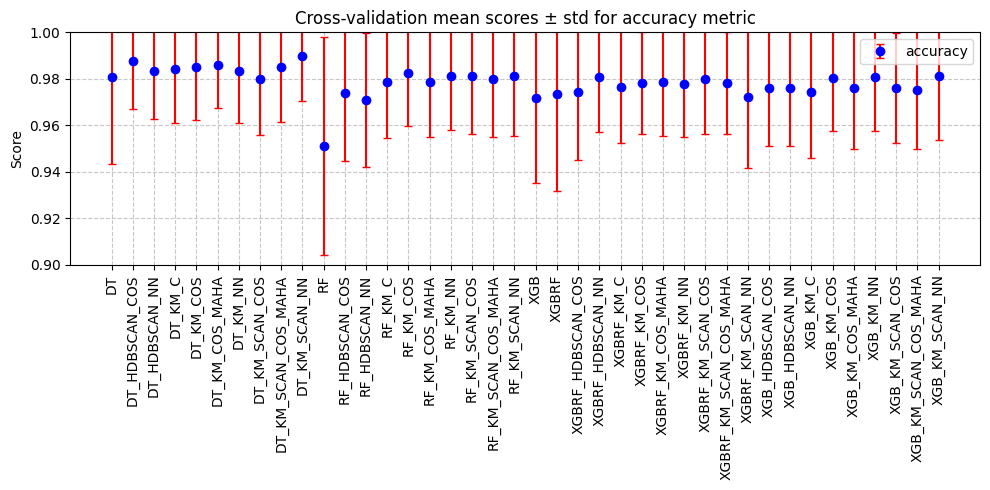

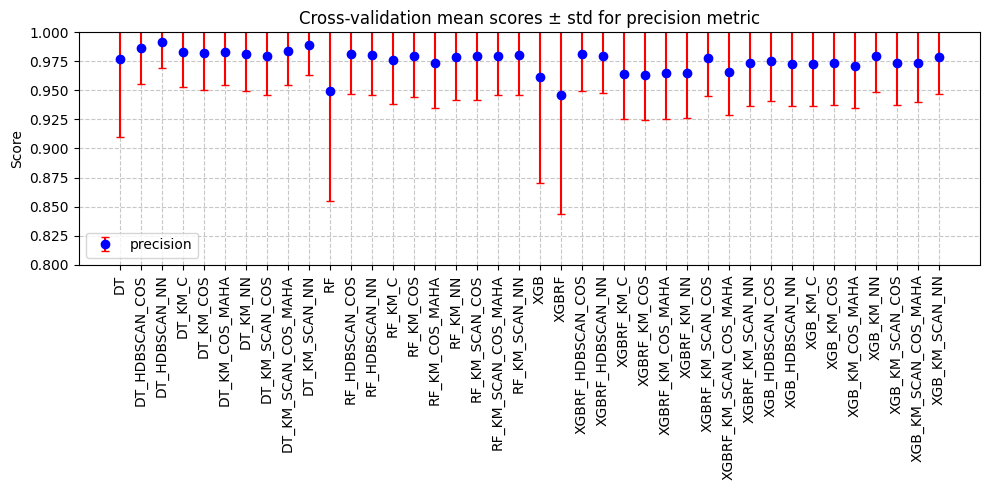

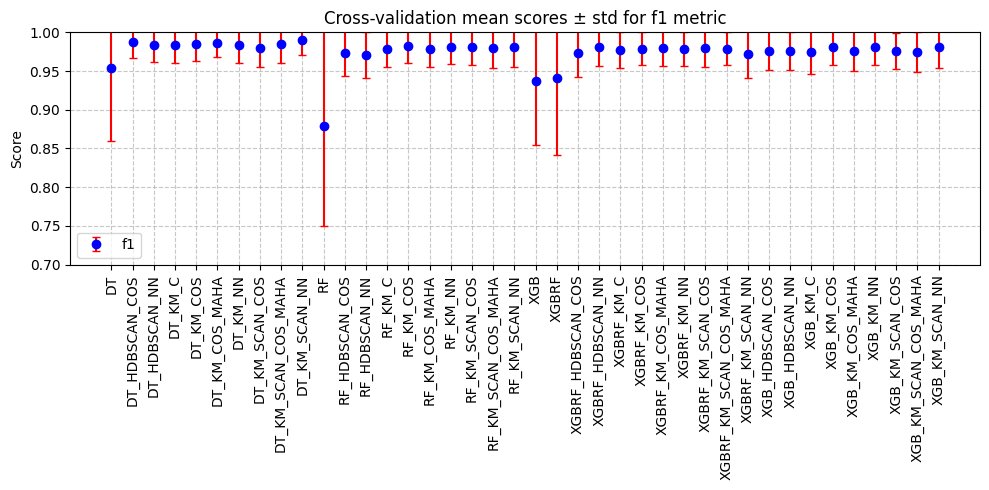

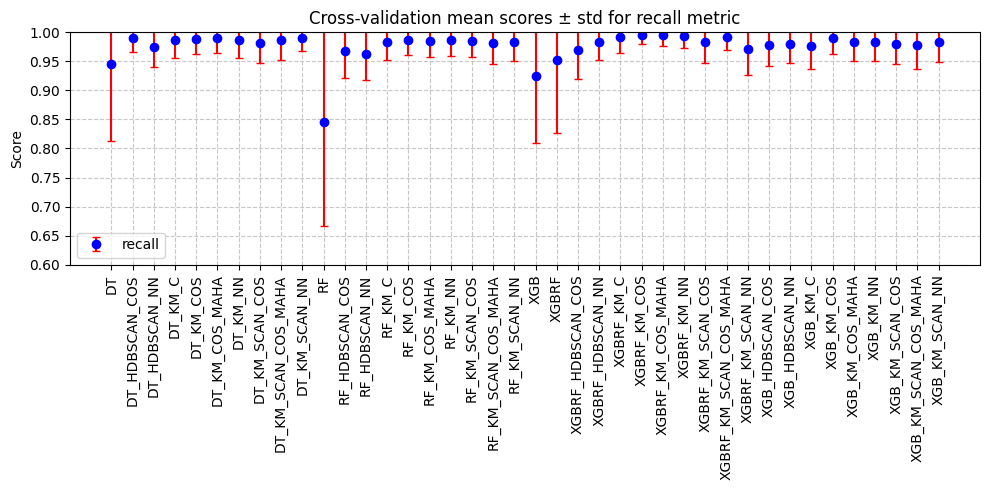

In [68]:
""" with pd.ExcelFile(excel_file_cross) as w:
    df_save_under_mean.to_excel(w, sheet_name=name_sheet1)
with pd.ExcelFile(excel_file_cross2) as w1:
    df_save_under_std.to_excel(w1, sheet_name=name_sheet1)
 """
# Visualization results for all models and all datasets
for metric in goal:
    # Choose metric
    df_metric_mean = df_save_under_mean.loc[metric]   # mean
    df_metric_std = df_save_under_std.loc[metric]     # std
    
    max_std = df_metric_std.max()
    min_mean = df_metric_mean.min()
    ymin = round((min_mean - (max_std + 0.05)),1)

    plt.figure(figsize=(10,5))
    plt.errorbar(
        df_metric_mean.index,                # X: modele
        df_metric_mean.values,               # Y: mean
        yerr=df_metric_std.values,           # std
        fmt="o",                             # marker
        ecolor="red", capsize=3,             # color and capsize for error bars
        color="blue", label=metric
    )

    plt.title(f"Cross-validation mean scores ± std for {metric} metric")
    plt.ylim(ymin, 1)
    plt.ylabel("Score")
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"D:\\ml\\undersampling_data\\reports\\ssh\\results\\{metric}_chart.png", dpi=300)
    plt.show()